# VISUALIZATION : FermatKMedoïds and coefficient of variation  
# Moons dataset

1. [Motivation](#part1)
2. [Dataset and visualization](#part2)
3. [Performances Visualization](#part3)
    - [No harmonizer](#part3sec1)
    - [Eps-Harmonization](#part3sec2)
    - [Knn-harmonizer](#part3sec3)
    - [Combined figure](#part3sec4)
4. [Coefficient of variation](#part4)

In [1]:
import seaborn as sns
sns.set()
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
#from sklearn.metrics import fowlkes_mallows_score
import pandas as pd
from fermat.clusterize import *
from fermat.preprocessing import *
from fermat.L_fermat_stat import *

# Motivation <a id="part1"></a>

We would like to experiment the **K-medoïds algorithm** on synthetic dataset using the **Fermat distance**. We denote this algorithm by **Fermat-KMedoïds**. Our goal here is to characterize the **Fermat distance**. Which means that considering a clustering problem, we don't aim at finding specific algorithms, rather we are interested in understanding the sensitivity of the Fermat distance to its parameter $\alpha$.

The **Fermat KMedoïds** algorithm aims at minimizing the **sample Fermat distance** between the observation and the centroïd of the cluster to which it belongs. Given an i.i.d. sample $\mathbb{X}_n=(X_1,\dots,X_n)$ and $K \in \mathbb{N}$ the number of clusters, the Fermat KMedoïds algorithm is characterized by the minimization of the objective over all possible partitionning of the sample $(C_1,\dots,C_K)$ :  

$$
\underset{(C_1,\dots,C_K)}{minimize} \sum_{l = 1}^K \sum_{X \in C_l} D_{\alpha}^n(X, X^l),
$$

where $X^l \in \left\{ C_l \cap \mathbb{X}_n \right\}$ is defined as the centroïd of the cluster $C_l$, and $D_{\alpha}^n(X, X^l)$ denotes the Fermat distance with parameter $\alpha$. 

We use two performance criteria :  

- Adjusted Mutual information 
- Adjusted Rand Index     
    
In this notebook we perform Fermat-KMedoïds on the 'Moons' dataset and we compute an estimationn of the coefficient of variation of the Fermat distance between two points of the set. Our plan of work is based on the three following goals.

1. We would like to se if we observe a $\alpha_0$ value that garanties a good clustering performance. Where good is understood in respect of the above performance criteria. In other words, a meaningful distance is obtained only for a sufficiently large value of $\alpha$.
  
2. On the other hand, using very large $\alpha$ comes with strong disavantages: large variability and computational precision problem. We expect to observe a $\bar{\alpha}$ above wich the clustering performances are declining and the coefficient of variation is going beyond a certain value. 
  
3. As a possible solution to these issues, we preprocess the data using 'harmonizers'. We will analyse how this might help (or not) to lower the variational coefficient of the sample Fermat distance while increasing clustering performances. 

- We import the **FermatKMeans** algorithm in the module *clusterize.py* from the python library : https://github.com/Fermat-distance/fermat

In [4]:
from fermat.clusterize import *

- We import the harmonize_points function in the module *preprocessing.py* from the python library : https://github.com/Fermat-distance/fermat

In [5]:
from fermat.preprocessing import *

# Dataset and Harmonization <a id="part2"></a>

- We simulate and visualize the synthetic data set

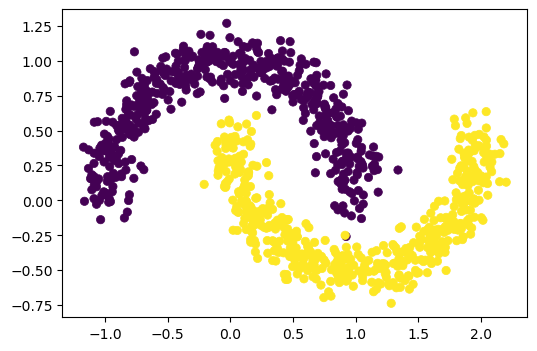

In [8]:
#Data simulation
seed=0
np.random.seed(seed)
n = 1000
X, labels = make_moons(n_samples=n,noise=0.1)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X[:,0], X[:,1], c=labels, edgecolors='k', linewidths=0.5, label='true');

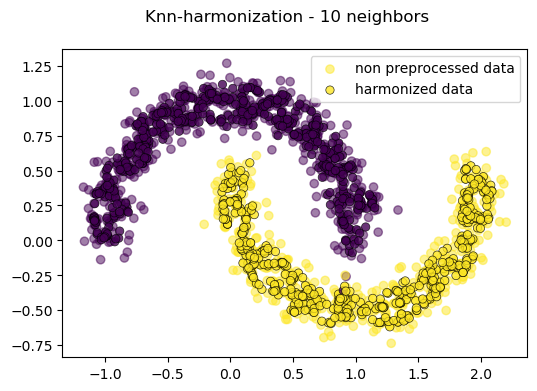

In [9]:
#knn harmonizer 
harmonizer = 'Knn'
k = 10
K = harmonize_points(X, method=harmonizer, k=k, include_self=False)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0], X[:,1], c=labels, alpha=.5, label='non preprocessed data')
ax.scatter(K[:,0], K[:,1], c=labels, linewidths=0.5, alpha=.8, edgecolors='k', label='harmonized data')
#ax.set_title('Normal blobs \n sample size=%s'%(X.shape[0]))
ax.legend(loc='upper right')
plt.suptitle(f"{harmonizer}-harmonization - {k} neighbors")


plt.savefig('Fig_Moons_harmonizerK.pdf')

In [10]:
n_harmonizations = 3
MK = harmonize_points(K, method=harmonizer, k=k, include_self=False)
#MKK = harmonize_points(KK, method=harmonizer, k=k, include_self=False)
for _ in range(n_harmonizations-2):
    MK = harmonize_points(MK, method=harmonizer, k=k, include_self=False)
    #MKK = harmonize_points(MKK, method=harmonizer, k=k, include_self=False)

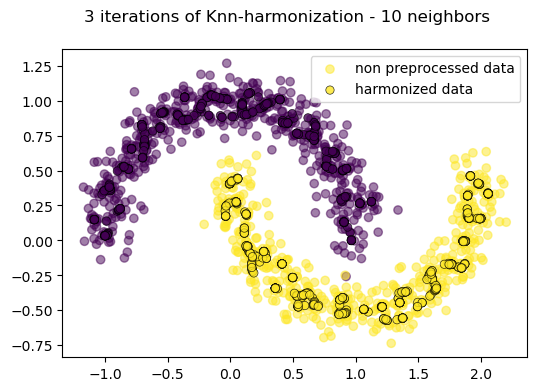

In [11]:
#knn harmonizer 
harmonizer = '3 iterations of Knn'
k = 10
#K = harmonize_points(X, method=harmonizer, k=k, include_self=False)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0], X[:,1], c=labels, alpha=.5, label='non preprocessed data')
ax.scatter(MK[:,0], MK[:,1], c=labels, linewidths=0.5, alpha=.8, edgecolors='k', label='harmonized data')
#ax.set_title('Normal blobs \n sample size=%s'%(X.shape[0]))
ax.legend(loc='upper right')
plt.suptitle(f"{harmonizer}-harmonization - {k} neighbors")


plt.savefig('Fig_Moons_harmonizerMK.pdf')

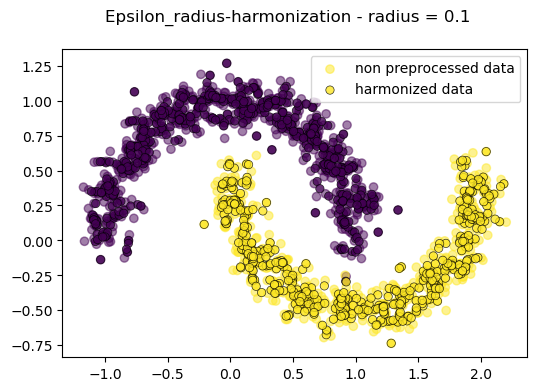

In [14]:
#knn harmonizer 
harmonizer = 'Epsilon_radius'
eps = 0.1
E = harmonize_points(X, method=harmonizer, eps=eps, include_self=False)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0], X[:,1], c=labels, alpha=.5, label='non preprocessed data')
ax.scatter(E[:,0], E[:,1], c=labels, linewidths=0.5, alpha=.8, edgecolors='k', label='harmonized data')
#ax.set_title('Normal blobs \n sample size=%s'%(X.shape[0]))
ax.legend(loc='upper right')
plt.suptitle(f"{harmonizer}-harmonization - radius = {eps}")


plt.savefig('Fig_Moons_harmonizerE.pdf')

In [15]:
n_harmonizations = 3
ME = harmonize_points(E, method=harmonizer, eps=eps, include_self=False)
#MEE = harmonize_points(EE, method=harmonizer, eps=eps, include_self=False)
for _ in range(n_harmonizations-2):
    ME = harmonize_points(ME, method=harmonizer, eps=eps, include_self=False)
    #MEE = harmonize_points(MEE, method=harmonizer, eps=eps, include_self=False)

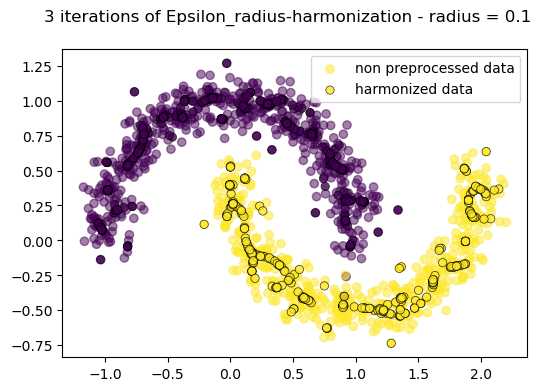

In [16]:
harmonizer = '3 iterations of Epsilon_radius'
eps = 0.1
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0], X[:,1], c=labels, alpha=.5, label='non preprocessed data')
ax.scatter(ME[:,0], ME[:,1], c=labels, linewidths=0.5, alpha=.8, edgecolors='k', label='harmonized data')
#ax.set_title('Normal blobs \n sample size=%s'%(X.shape[0]))
ax.legend(loc='upper right')
plt.suptitle(f"{harmonizer}-harmonization - radius = {eps}")


plt.savefig('Fig_Moons_harmonizerME.pdf')

# Performances Visualisation <a id="part3"></a>

## Non preprocessed data <a id="part3sec1"></a>

In [2]:
#Figure parameters
titlefig_AMI_ARI = "xp_result/FIG_Moons_R_AMI_ARI.pdf"
titlefig_ARI = "xp_result/FIG_Moons_R_ARI.pdf"
#plt.figure(figsize=(12,6.5)) #Plot all perf curves
##########################################

df_amiR = pd.read_csv('xp_result/Moons_R_nxp_1000_AMI.csv')
AMI_R = df_amiR.to_numpy()

df_ariR = pd.read_csv('xp_result/Moons_R_nxp_1000_ARI.csv')
ARI_R = df_ariR.to_numpy()
##########################################

#Clustering parameters
n = 1000 #Sample size
n_xp = 1000 #Number of experiences

cluster_qty = 2
dataset = 'Moons data set'
h = 0
harmonizer = ['No','Knn','Epsilon neighborhood','Delaunay'][h]
#n_harmonizations = 1
#k = Best_param #Need to be optimized first
#k = 20
#eps = Best_param #Need to be optimized first
#eps = 0.25

all_alpha = np.linspace(1, 8, 29, endpoint=True) #Fermat dist parameter

##########################################


#best performance in average
#Index_meanmax = np.argmax(AMI_.mean(axis=0))
#Best_AMImean = AMI_.mean(axis=0)[Index_meanmax]
#alpha_0 = all_alpha[Index_meanmax]

#Index_meanmax = np.argmax(ARI_.mean(axis=0))
#Best_ARImean = ARI_.mean(axis=0)[Index_meanmax]

#Best median
#Best_AMImed = np.max(np.percentile(AMI_,50,axis=0))
#Best_ARImed = np.max(np.percentile(ARI_,50,axis=0))

#Best 1st quartile
#Best_AMI1q = np.max(np.percentile(AMI_,25,axis=0))
#Best_ARI1q = np.max(np.percentile(ARI_,25,axis=0))

#Best 3rd quartile
#Best_AMI3q = np.max(np.percentile(AMI_,75,axis=0))
#Best_ARI3q = np.max(np.percentile(ARI_,75,axis=0))

In [3]:
AMI_R = AMI_R[:250]
ARI_R = ARI_R[:250]

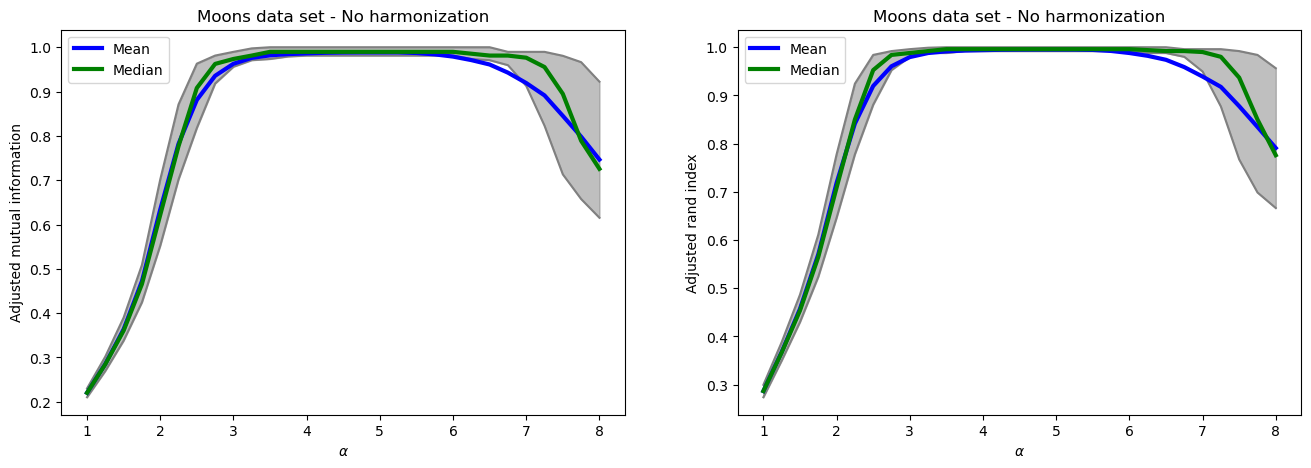

In [4]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_alpha, np.percentile(AMI_R,25,axis=0),color='grey')
ax1.plot(all_alpha, np.percentile(AMI_R,75,axis=0),color='grey')
ax1.fill_between(all_alpha, np.percentile(AMI_R,25,axis=0), np.percentile(AMI_R,75,axis=0), color='grey', alpha=0.5)
ax1.plot(all_alpha, AMI_R.mean(axis=0), color='blue', linewidth=3, label='Mean')
ax1.plot(all_alpha, np.percentile(AMI_R,50,axis=0),color='green', linewidth=3, label='Median')
#ax1.set_ylim(0.85,1.05)
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("Adjusted mutual information")
ax1.legend(loc='upper left')
ax1.set_title(f"{dataset} - {harmonizer} harmonization");

ax2 = fig.add_subplot(1,2,2)
ax2.plot(all_alpha, np.percentile(ARI_R,25,axis=0),color='grey')
ax2.plot(all_alpha, np.percentile(ARI_R,75,axis=0),color='grey')
ax2.fill_between(all_alpha, np.percentile(ARI_R,25,axis=0), np.percentile(ARI_R,75,axis=0), color='grey', alpha=0.5)
ax2.plot(all_alpha, ARI_R.mean(axis=0), color='blue', linewidth=3, label='Mean')
ax2.plot(all_alpha, np.percentile(ARI_R,50,axis=0),color='green', linewidth=3, label='Median')
#ax2.set_ylim(0.85,1.05)
ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel("Adjusted rand index")
ax2.set_title(f"{dataset} - {harmonizer} harmonization")
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2.legend(loc='upper left');
plt.savefig(titlefig_AMI_ARI)

## Eps-neighborhood Harmonizer <a id="part3sec2"></a>

In [5]:
#check that the shape is what we expect
df_amiE = pd.read_csv('xp_result/Moons_E05_2_nxp_250_AMI.csv')
AMI_E = df_amiE.to_numpy()
print(AMI_E.shape)
df_ariE = pd.read_csv('xp_result/Moons_E05_2_nxp_250_ARI.csv')
ARI_E = df_ariE.to_numpy()
print(ARI_E.shape)

(250, 29)
(250, 29)


In [6]:
#Figure parameters
titlefig_AMI_ARI = "xp_result/FIG_Moons_E_AMI_ARI.pdf"
titlefig_ARI = "xp_result/FIG_Moons_E_ARI.pdf"
#plt.figure(figsize=(12,6.5)) #Plot all perf curves
##########################################

#df_amiE = pd.read_csv('xp_result/Moons_E07_2_nxp_250_AMI.csv')
#AMI_E = df_amiE.to_numpy()

#df_ariE = pd.read_csv('xp_result/Moons_E07_2_nxp_250_ARI.csv')
#ARI_E = df_ariE.to_numpy()
##########################################

#Clustering parameters
n = 1000 #Sample size
n_xp = 250 #Number of experiences

cluster_qty = 2
dataset = 'Moons data set'
h = 2
harmonizer = ['No','Knn','Epsilon neighborhood','Delaunay'][h]
#n_harmonizations = 1
#k = Best_param #Need to be optimized first
#k = 20
#eps = Best_param #Need to be optimized first
#eps = 0.25

all_alpha = np.linspace(1, 8, 29, endpoint=True) #Fermat dist parameter

##########################################


#best performance in average
#Index_meanmax = np.argmax(AMI_.mean(axis=0))
#Best_AMImean = AMI_.mean(axis=0)[Index_meanmax]
#alpha_0 = all_alpha[Index_meanmax]

#Index_meanmax = np.argmax(ARI_.mean(axis=0))
#Best_ARImean = ARI_.mean(axis=0)[Index_meanmax]

#Best median
#Best_AMImed = np.max(np.percentile(AMI_,50,axis=0))
#Best_ARImed = np.max(np.percentile(ARI_,50,axis=0))

#Best 1st quartile
#Best_AMI1q = np.max(np.percentile(AMI_,25,axis=0))
#Best_ARI1q = np.max(np.percentile(ARI_,25,axis=0))

#Best 3rd quartile
#Best_AMI3q = np.max(np.percentile(AMI_,75,axis=0))
#Best_ARI3q = np.max(np.percentile(ARI_,75,axis=0))

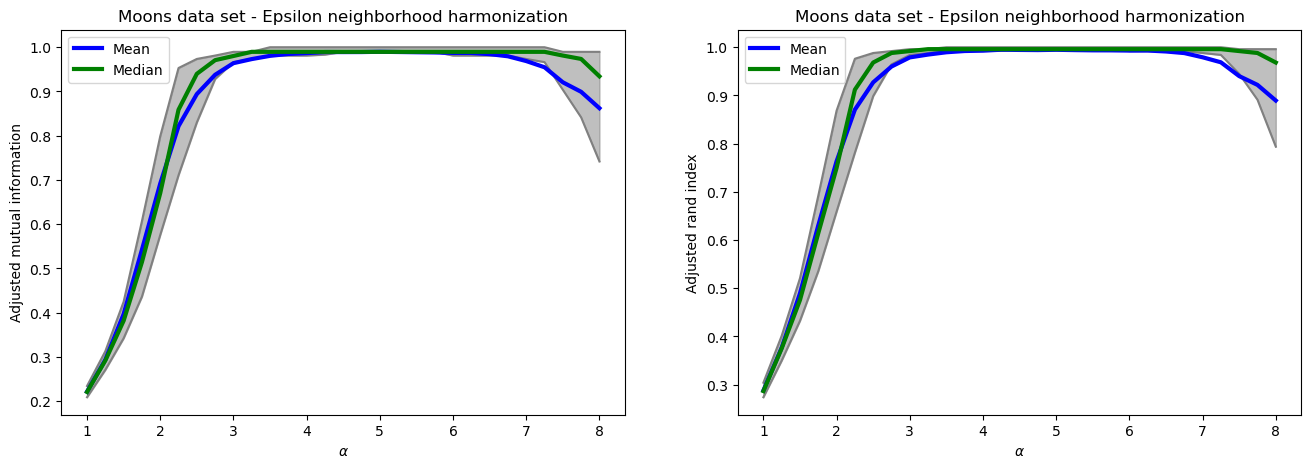

In [8]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_alpha, np.percentile(AMI_E,25,axis=0),color='grey')
ax1.plot(all_alpha, np.percentile(AMI_E,75,axis=0),color='grey')
ax1.fill_between(all_alpha, np.percentile(AMI_E,25,axis=0), np.percentile(AMI_E,75,axis=0), color='grey', alpha=0.5)
ax1.plot(all_alpha, AMI_E.mean(axis=0), color='blue', linewidth=3, label='Mean')
ax1.plot(all_alpha, np.percentile(AMI_E,50,axis=0),color='green', linewidth=3, label='Median')
#ax1.set_ylim(0.85,1.05)
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("Adjusted mutual information")
ax1.legend(loc='upper left')
ax1.set_title(f"{dataset} - {harmonizer} harmonization")
#ax1.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2 = fig.add_subplot(1,2,2)
ax2.plot(all_alpha, np.percentile(ARI_E,25,axis=0),color='grey')
ax2.plot(all_alpha, np.percentile(ARI_E,75,axis=0),color='grey')
ax2.fill_between(all_alpha, np.percentile(ARI_E,25,axis=0), np.percentile(ARI_E,75,axis=0), color='grey', alpha=0.5)
ax2.plot(all_alpha, ARI_E.mean(axis=0), color='blue', linewidth=3, label='Mean')
ax2.plot(all_alpha, np.percentile(ARI_E,50,axis=0),color='green', linewidth=3, label='Median')
#ax2.set_ylim(0.85,1.05)
ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel("Adjusted rand index")
ax2.set_title(f"{dataset} - {harmonizer} harmonization")
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2.legend(loc='upper left');
plt.savefig(titlefig_AMI_ARI)

## Knn-Harmonizer  <a id="part3sec3"></a>

In [9]:
#check that the shape is what we expect
df_amiK1 = pd.read_csv('xp_result/Moons_K2_4_nxp_250_AMI.csv')
AMI_K1 = df_amiK1.to_numpy()
#print(AMI_K1.shape)
df_amiK = pd.read_csv('xp_result/Moons_K5_15_nxp_250_AMI.csv')
AMI_K = df_amiK.to_numpy()
#print(AMI_K.shape)


df_ariK1 = pd.read_csv('xp_result/Moons_K2_4_nxp_250_ARI.csv')
ARI_K1 = df_ariK1.to_numpy()
#print(ARI_K1.shape)
df_ariK = pd.read_csv('xp_result/Moons_K5_15_nxp_250_ARI.csv')
ARI_K = df_ariK.to_numpy()
#print(ARI_K.shape)

(250, 29)
(250, 29)
(250, 29)
(250, 29)


In [10]:
#Figure parameters
titlefig_AMI_ARI = "xp_result/FIG_Moons_K_AMI_ARI_V2.pdf"
#titlefig_ARI = "xp_result/FIG_Moons_E_ARI.pdf"
#plt.figure(figsize=(12,6.5)) #Plot all perf curves
##########################################

#df_amiE = pd.read_csv('xp_result/Moons_E07_2_nxp_250_AMI.csv')
#AMI_E = df_amiE.to_numpy()

#df_ariE = pd.read_csv('xp_result/Moons_E07_2_nxp_250_ARI.csv')
#ARI_E = df_ariE.to_numpy()
##########################################

#Clustering parameters
n = 1000 #Sample size
n_xp = 250 #Number of experiences

cluster_qty = 2
dataset = 'Moons data set'
h = 1
harmonizer = ['No','Knn','Epsilon neighborhood','Delaunay'][h]
#n_harmonizations = 1
#k = Best_param #Need to be optimized first
#k = 20
#eps = Best_param #Need to be optimized first
#eps = 0.25

all_alpha = np.linspace(1, 8, 29, endpoint=True) #Fermat dist parameter

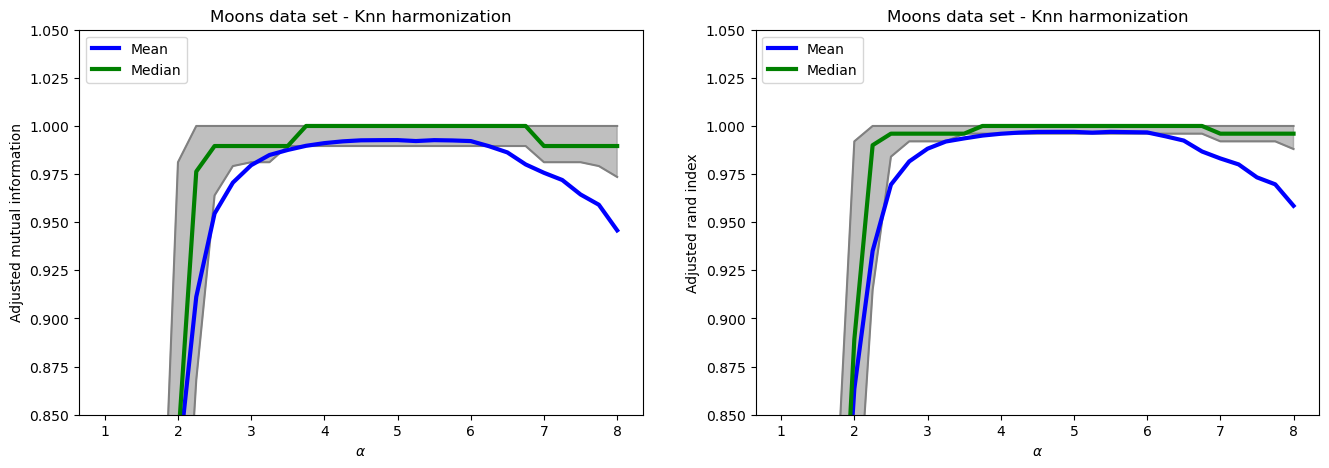

In [11]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_alpha, np.percentile(AMI_K,25,axis=0),color='grey')
ax1.plot(all_alpha, np.percentile(AMI_K,75,axis=0),color='grey')
ax1.fill_between(all_alpha, np.percentile(AMI_K,25,axis=0), np.percentile(AMI_K,75,axis=0), color='grey', alpha=0.5)
ax1.plot(all_alpha, AMI_K.mean(axis=0), color='blue', linewidth=3, label='Mean')
ax1.plot(all_alpha, np.percentile(AMI_K,50,axis=0),color='green', linewidth=3, label='Median')
ax1.set_ylim(0.85,1.05)
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("Adjusted mutual information")
ax1.legend(loc='upper left')
ax1.set_title(f"{dataset} - {harmonizer} harmonization")
#ax1.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2 = fig.add_subplot(1,2,2)
ax2.plot(all_alpha, np.percentile(ARI_K,25,axis=0),color='grey')
ax2.plot(all_alpha, np.percentile(ARI_K,75,axis=0),color='grey')
ax2.fill_between(all_alpha, np.percentile(ARI_K,25,axis=0), np.percentile(ARI_K,75,axis=0), color='grey', alpha=0.5)
ax2.plot(all_alpha, ARI_K.mean(axis=0), color='blue', linewidth=3, label='Mean')
ax2.plot(all_alpha, np.percentile(ARI_K,50,axis=0),color='green', linewidth=3, label='Median')
ax2.set_ylim(0.85,1.05)
ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel("Adjusted rand index")
ax2.set_title(f"{dataset} - {harmonizer} harmonization")
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2.legend(loc='upper left');
plt.savefig(titlefig_AMI_ARI)

## Combined figure <a id="part3sec4"></a>

In [8]:
#Figure parameters
#titlefig_AMI_ARI = "xp_result/FIG_Moons_K_AMI_ARI_V2.pdf"
#titlefig_ARI = "xp_result/FIG_Moons_E_ARI.pdf"
#plt.figure(figsize=(12,6.5)) #Plot all perf curves
##########################################
#Clustering parameters
n = 1000 #Sample size
n_xp = 250 #Number of experiences

titlefig = 'xp_result/Fig_Moons_Combined.pdf'

cluster_qty = 2
dataset = 'Moons data set'
#h = 1
#harmonizer = ['No','Knn','Epsilon neighborhood','Delaunay'][h]
#n_harmonizations = 1
#k = Best_param #Need to be optimized first
#k = 20
#eps = Best_param #Need to be optimized first
#eps = 0.25

all_alpha = np.linspace(1, 8, 29, endpoint=True) #Fermat dist parameter

In [3]:
#import clustering performances

df_amiR = pd.read_csv('xp_result/Moons_R_nxp_1000_AMI.csv')
AMI_R = df_amiR.to_numpy()

df_ariR = pd.read_csv('xp_result/Moons_R_nxp_1000_ARI.csv')
ARI_R = df_ariR.to_numpy()

AMI_R = AMI_R[:250]
ARI_R = ARI_R[:250]

df_amiK = pd.read_csv('xp_result/Moons_K5_15_nxp_250_AMI.csv')
AMI_K = df_amiK.to_numpy()

df_ariK = pd.read_csv('xp_result/Moons_K5_15_nxp_250_ARI.csv')
ARI_K = df_ariK.to_numpy()

df_amiE = pd.read_csv('xp_result/Moons_E05_2_nxp_250_AMI.csv')
AMI_E = df_amiE.to_numpy()

df_ariE = pd.read_csv('xp_result/Moons_E05_2_nxp_250_ARI.csv')
ARI_E = df_ariE.to_numpy()

In [6]:
#Import fermat stat from csv file
title = 'xp_result/CV_moons_R.csv'

df = pd.read_csv(title)
#df_ = df.to_numpy()
df_combined_R = process_df(df) 
CV_R = df_combined_R['variation'].to_numpy()
I_Rup = df_combined_R['variation_upper'].to_numpy()
I_Rlo = df_combined_R['variation_lower'].to_numpy()

In [4]:
#Import fermat stat from csv file
title = 'xp_result/CV_moons_K.csv'

df = pd.read_csv(title)
#df_ = df.to_numpy()
df_combined_K = process_df(df)
CV_K = df_combined_K['variation'].to_numpy()

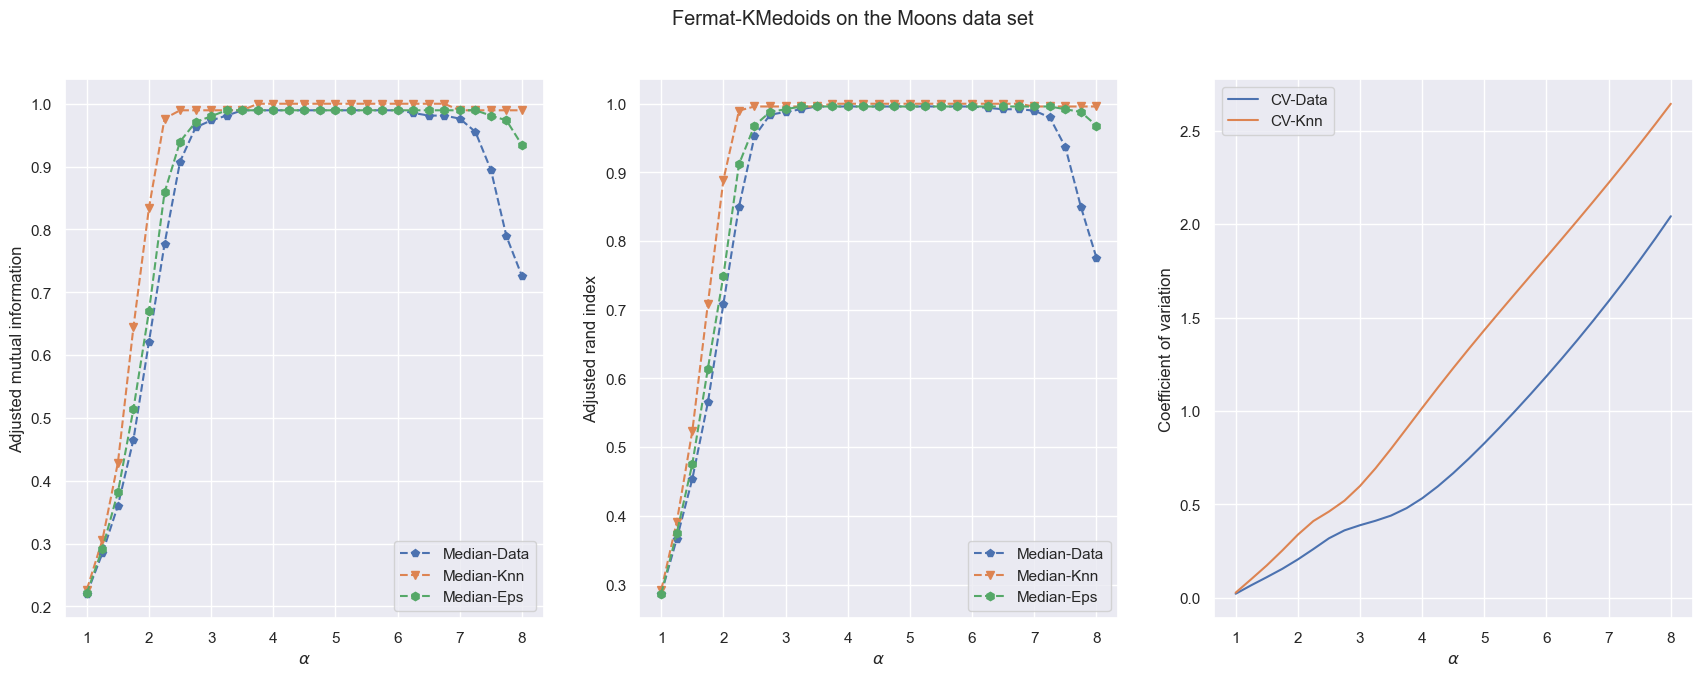

In [10]:
fig = plt.figure(figsize=(21,7))
ax1 = fig.add_subplot(1,3,1)
#ax1.plot(all_alpha, AMI_R.mean(axis=0), color='blue', label='Mean-Raw')
ax1.plot(all_alpha, np.percentile(AMI_R,50,axis=0), linestyle='--', marker='p', label='Median-Data')
#ax1.plot(all_alpha, AMI_K.mean(axis=0), color='c', label='Mean-Knn')
ax1.plot(all_alpha, np.percentile(AMI_K,50,axis=0), linestyle='--', marker='v', label='Median-Knn')
#ax1.plot(all_alpha, AMI_E.mean(axis=0), color='green', label='Mean-Eps')
ax1.plot(all_alpha, np.percentile(AMI_E,50,axis=0), linestyle='--', marker='h', label='Median-Eps')

ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("Adjusted mutual information")
ax1.legend()
#ax1.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");

ax2 = fig.add_subplot(1,3,2)
#ax2.plot(all_alpha, ARI_R.mean(axis=0), color='blue', label='Mean-Data')
ax2.plot(all_alpha, np.percentile(ARI_R,50,axis=0), linestyle='--', marker='p', label='Median-Data')
#ax2.plot(all_alpha, ARI_K.mean(axis=0), color='c', label='Mean-Knn')
ax2.plot(all_alpha, np.percentile(ARI_K,50,axis=0), linestyle='--', marker='v', label='Median-Knn')
#ax2.plot(all_alpha, ARI_E.mean(axis=0), color='green', label='Mean-Eps')
ax2.plot(all_alpha, np.percentile(ARI_E,50,axis=0), linestyle='--', marker='h', label='Median-Eps')

ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel("Adjusted rand index")
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2.legend();

ax3 = fig.add_subplot(1,3,3)
ax3.plot(all_alpha, CV_R, label='CV-Data')
#ax3.plot(all_alpha, I_Rup, '--', label='variation lower')
#ax3.plot(all_alpha, I_Rlo, '--', label='variation upper')
ax3.plot(all_alpha, CV_K, label='CV-Knn')
#ax3.plot(all_alpha, CV_E, label='CV-Eps')
ax3.set_xlabel(r'$\alpha$')
ax3.set_ylabel("Coefficient of variation")
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax3.legend();
plt.suptitle(f'Fermat-KMedoids on the {dataset}')
plt.savefig(titlefig)

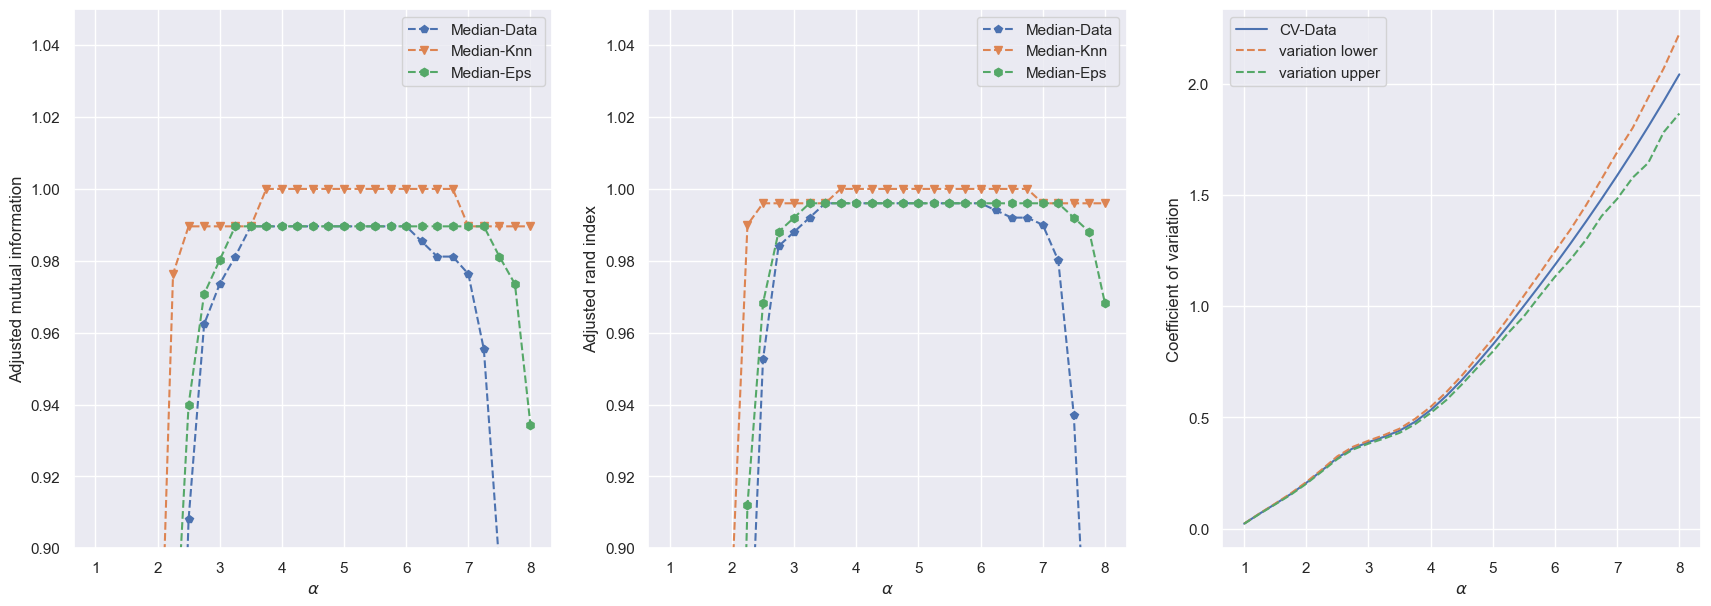

In [36]:
fig = plt.figure(figsize=(21,7))
ax1 = fig.add_subplot(1,3,1)
#ax1.plot(all_alpha, AMI_R.mean(axis=0), color='blue', label='Mean-Raw')
ax1.plot(all_alpha, np.percentile(AMI_R,50,axis=0), linestyle='--', marker='p', label='Median-Data')
#ax1.plot(all_alpha, AMI_K.mean(axis=0), color='c', label='Mean-Knn')
ax1.plot(all_alpha, np.percentile(AMI_K,50,axis=0), linestyle='--', marker='v', label='Median-Knn')
#ax1.plot(all_alpha, AMI_E.mean(axis=0), color='green', label='Mean-Eps')
ax1.plot(all_alpha, np.percentile(AMI_E,50,axis=0), linestyle='--', marker='h', label='Median-Eps')

ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("Adjusted mutual information")
ax1.set_ylim(0.9,1.05)
ax1.legend()
#ax1.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");

ax2 = fig.add_subplot(1,3,2)
#ax2.plot(all_alpha, ARI_R.mean(axis=0), color='blue', label='Mean-Data')
ax2.plot(all_alpha, np.percentile(ARI_R,50,axis=0), linestyle='--', marker='p', label='Median-Data')
#ax2.plot(all_alpha, ARI_K.mean(axis=0), color='c', label='Mean-Knn')
ax2.plot(all_alpha, np.percentile(ARI_K,50,axis=0), linestyle='--', marker='v', label='Median-Knn')
#ax2.plot(all_alpha, ARI_E.mean(axis=0), color='green', label='Mean-Eps')
ax2.plot(all_alpha, np.percentile(ARI_E,50,axis=0), linestyle='--', marker='h', label='Median-Eps')

ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel("Adjusted rand index")
ax2.set_ylim(0.9,1.05)
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax2.legend();

ax3 = fig.add_subplot(1,3,3)
ax3.plot(all_alpha, CV_R, label='CV-Data')
ax3.plot(all_alpha, I_Rup, '--', label='variation lower')
ax3.plot(all_alpha, I_Rlo, '--', label='variation upper')
#ax3.plot(all_alpha, CV_K, label='CV-Knn')
#ax3.plot(all_alpha, CV_E, label='CV-Eps')
ax3.set_xlabel(r'$\alpha$')
ax3.set_ylabel("Coefficient of variation")
#ax2.set_title(f"{dataset} - non-preprocessed data - {n_xp} experiences");
ax3.legend();

# Coefficient of variation

In [17]:
import seaborn as sns
sns.set()

In [18]:
#Non preprocessed data
#Import fermat stat from csv file
title = 'xp_result/CV_moons_R.csv'
df = pd.read_csv(title)
#df_ = df.to_numpy()
df_combined = process_df(df)
my_d, my_n = 2, 1000
#Figure parameters
titlefig_CV = "xp_result/Fig_CV_moons_R.pdf"

#plt.figure(figsize=(12,6.5)) #Plot all perf curves
##########################################

#df_amiE = pd.read_csv('xp_result/Moons_E07_2_nxp_250_AMI.csv')
#AMI_E = df_amiE.to_numpy()

#df_ariE = pd.read_csv('xp_result/Moons_E07_2_nxp_250_ARI.csv')
#ARI_E = df_ariE.to_numpy()
##########################################

#Clustering parameters
n = 1000 #Sample size
n_xp = 5000 #Number of experiences

cluster_qty = 2
dataset = 'Moons data set'
h = 0
harmonizer = ['No','Knn','Epsilon neighborhood','Delaunay'][h]

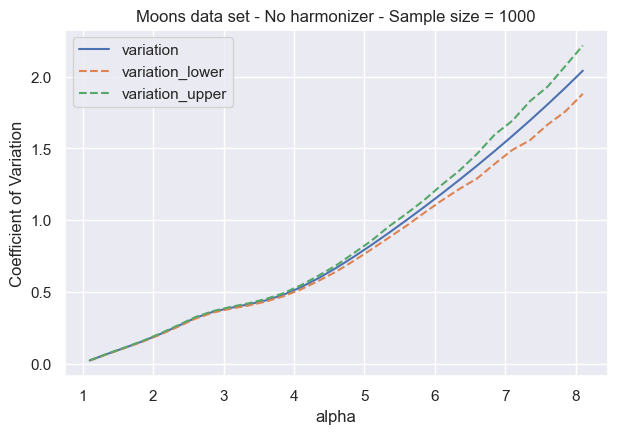

In [19]:
#plot
fig, axes = plt.subplots(figsize=(7,4.5))
#x = np.linspace(1,8.1,50)
#y_sup = np.sqrt( gamma(2*x+1) / gamma(x+1)**2 ) / np.sqrt(my_n)
#y_inf = np.sqrt( np.clip( ( gamma(2*x+1) / gamma(x+1)**2 + 1 - 4 * x * (x+1) ) / my_n, a_min=0, a_max=None) )
#plt.plot(x, y_inf, color='r', linewidth=1, label='lower bound')
#axes.set_ylim((-0.1,4.25))
#plt.legend()

df_combined.plot('alpha', 'variation', ax=axes)
df_combined.plot('alpha', 'variation_lower', ls='--', ax=axes)
df_combined.plot('alpha', 'variation_upper', ls='--', ax=axes)
axes.set_ylabel('Coefficient of Variation')
axes.set_title(f"{dataset} - {harmonizer} harmonizer - Sample size = {my_n}");
plt.savefig(titlefig_CV);

# CV with K-nn harmonizer

In [4]:
%%time
##########################################
seed=0
#Clustering parameters
n = 1000 #Sample size
#n_xp = 250 #Number of experiences
d = 2
#cluster_qty = 2
dataset = 'Moons data set'
h = 1
harmonizer = [None,'Knn','Epsilon_radius','Delaunay'][h]
#n_harmonizations = 1
#k = Best_param #Need to be optimized first
k_values = pd.read_csv('xp_result/Moons_Kopti5_15_nxp_250_ami.csv')
k_values = k_values.to_numpy() # The best param for each clustering experience. !!array of arrays!!
#k_values = k_values[:3]
#eps = Best_param #Need to be optimized first
eps = None

all_alpha = np.linspace(1.1, 8.1, 29, endpoint=True) #Fermat dist parameter
titlecsv = 'xp_result/TESTCV_moons_K.csv'
###########################################

#Fermat dist parameter
x = np.array([-0.25,1])
y = np.array([0.,0.5])
#titlecsv = "xp_result/CV_moons_1.csv"

##########################################
for i,k in enumerate(k_values):    
    if i == 0:
        df_ = fermat_simu_moons(n=n,d=d,alphas=all_alpha,x=x,y=y,n_simulations=20,harmonizer=harmonizer,k=k[0],eps=eps,seed=seed)
    else:
        df = fermat_simu_moons(n=n,d=d,alphas=all_alpha,x=x,y=y,n_simulations=20,harmonizer=harmonizer,k=k[0],eps=eps,seed=seed)
        df_ = pd.concat([df_,df],axis=0)
    seed += 20
df_.to_csv(titlecsv, index=False)
#df_combined = process_df(df_)

CPU times: user 31min 33s, sys: 10.5 s, total: 31min 44s
Wall time: 48min


# CV with Epsilon neighborhood harmonizer

In [ ]:
%%time
##########################################
seed=0
#Clustering parameters
n = 1000 #Sample size
#n_xp = 250 #Number of experiences
d = 2
#cluster_qty = 2
dataset = 'Moons data set'
h = 2
harmonizer = [None,'Knn','Epsilon_radius','Delaunay'][h]
#n_harmonizations = 1
#k = Best_param #Need to be optimized first
eps_values = pd.read_csv('xp_result/Moons_Eopti07_2_nxp_250_ami.csv')
eps_values = eps_values.to_numpy() # The best param for each clustering experience. !!array of arrays!!
#k_values = k_values[:3]
#eps = Best_param #Need to be optimized first
k = None

all_alpha = np.linspace(1.1, 8.1, 29, endpoint=True) #Fermat dist parameter
titlecsv = 'xp_result/TESTCV_moons_E.csv'
###########################################

#Fermat dist parameter
x = np.array([-0.25,1])
y = np.array([0.,0.5])
#titlecsv = "xp_result/CV_moons_1.csv"

##########################################
for i,eps in enumerate(eps_values):    
    if i == 0:
        df_ = fermat_simu_moons(n=n,d=d,alphas=all_alpha,x=x,y=y,n_simulations=20,harmonizer=harmonizer,k=k,eps=eps[0],seed=seed)
    else:
        df = fermat_simu_moons(n=n,d=d,alphas=all_alpha,x=x,y=y,n_simulations=20,harmonizer=harmonizer,k=k,eps=eps[0],seed=seed)
        df_ = pd.concat([df_,df],axis=0)
    seed += 20
df_.to_csv(titlecsv, index=False)
#df_combined = process_df(df_)